# Imports

In [1]:
from extract_center import CenterExtracter
from run import Run
from misc_tools import Plotter
import os

# Defining the Data Directory and Result Directory

In [2]:
sequence = "h1_try"
DATA_DIR = '../../data/extracted_images/' + sequence
RESULT_DIR = '../../data/results/' + sequence

# Initializing the Classes

In [3]:
run = Run(DATA_DIR, RESULT_DIR)
ce = CenterExtracter()

# Extracting Information

## Determining the *Region of Interest*

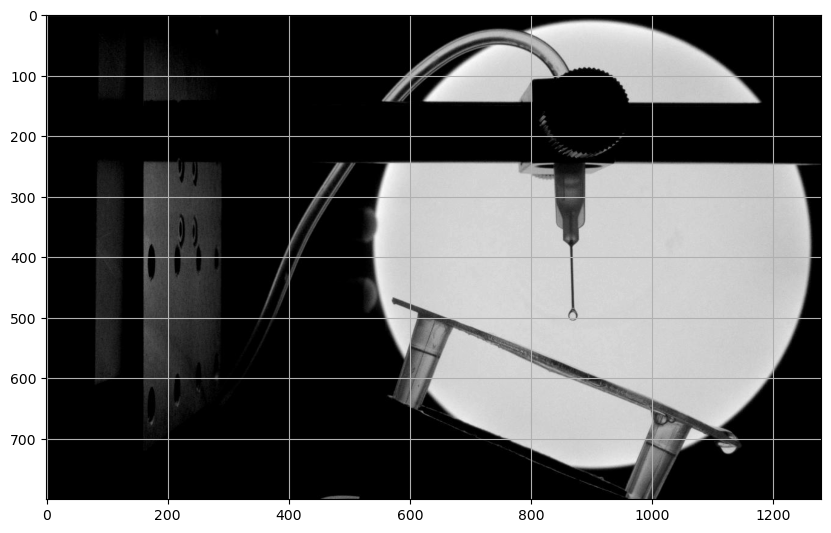

In [4]:
images = run.get_images()
img_1 = ce._read_image(images[0])
ce._show_image(img_1)

In [5]:
region_of_interset = (800, 450, 1200, 800)

## Reiniatilizing the Classes

In [6]:
run = Run(DATA_DIR, RESULT_DIR, region = region_of_interset)

## Setting the Reference Image

In [7]:
run._set_ref_image(-10)

## Extracting Information

In [13]:
df = run.all_points(crop_included=True, binary=True, verbose=False, num_images=None, raise_error=False)

Getting list of images...
Extracting data from images...


Extracting data from images: 100%|██████████| 219/219 [00:09<00:00, 22.14it/s]

Saving to csv...
Done!


## Some Preliminary Analysis

### None Values

In [9]:
df.isna().sum()

id        0
x        95
y        95
r1       95
r2       95
theta    95
dtype: int64

### Sample Images

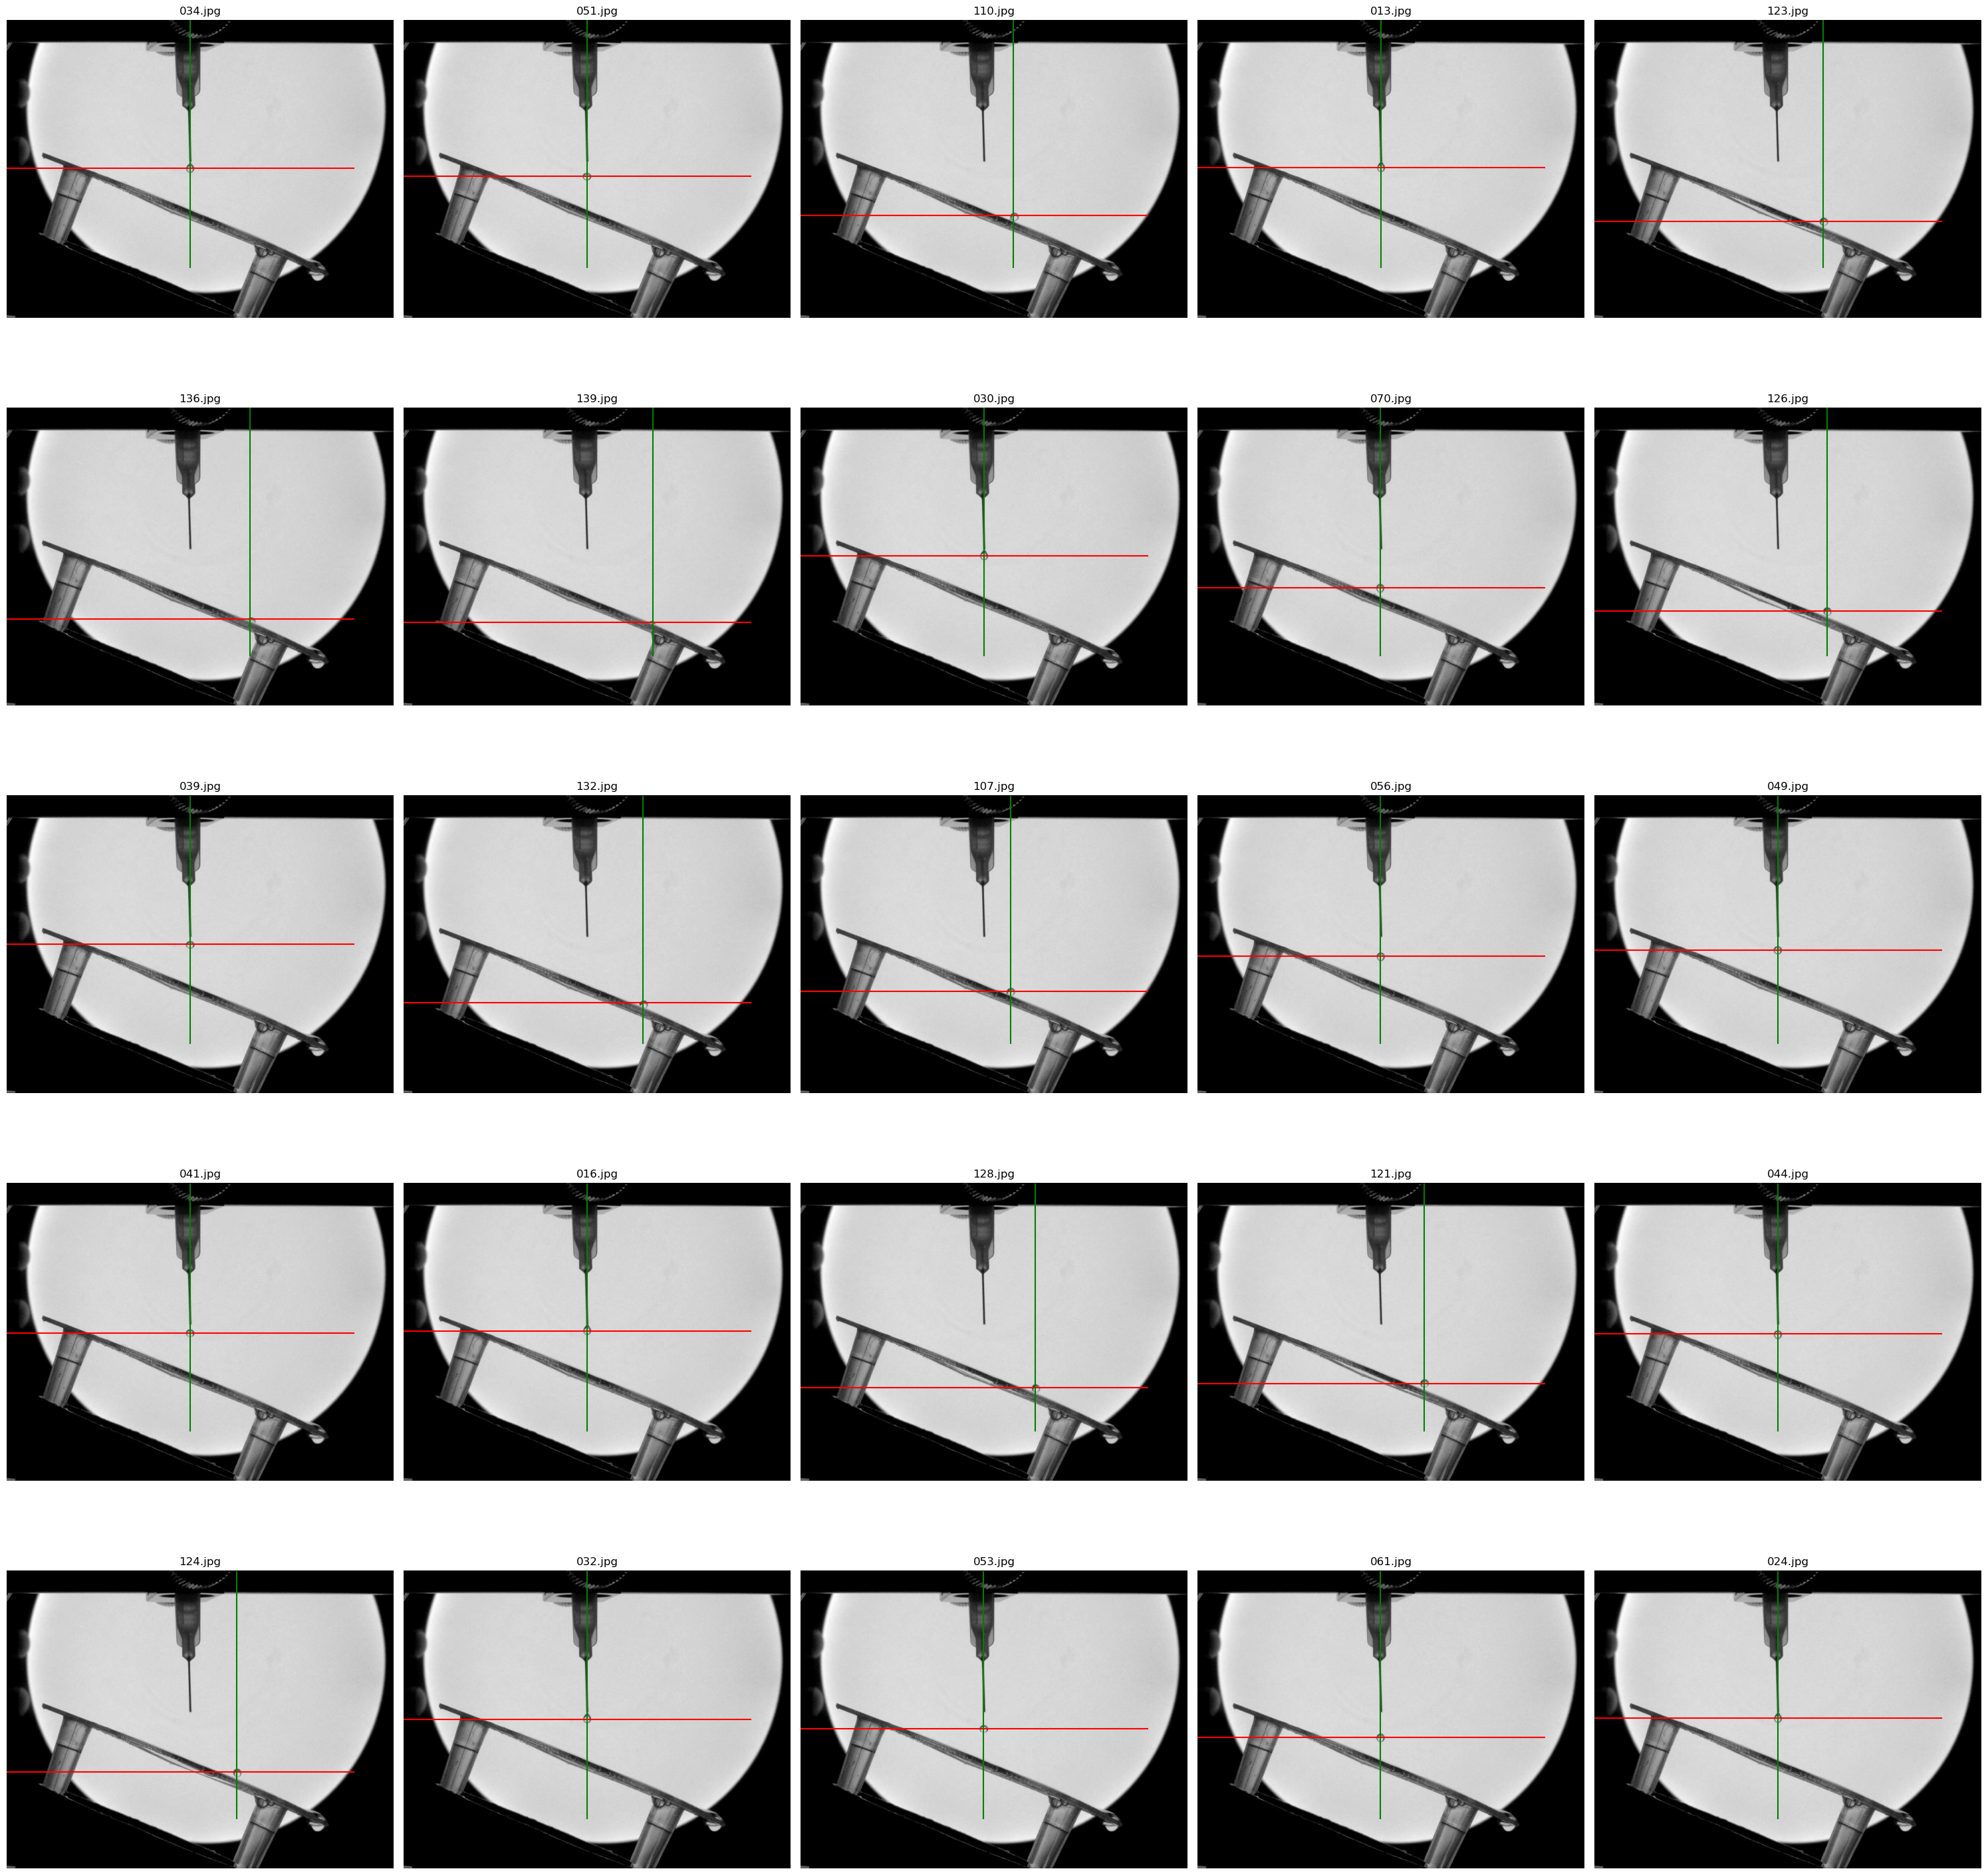

In [11]:
p = Plotter(df, RESULT_DIR)
p.get_samples(25, file_name = f"{sequence}_samples.png")

## Extracting Objectives

### Getting Frame Information

In [8]:
info_dict = {
    "first_frame": 1,
    "last_frame": 2,
    "contact_frame": 3,
    "leave_frame": 4,
    "angle": 5,
}

In [11]:
def get_info(file):
    information = {}
    with open(file, "r") as f:
        texts = f.readlines()
    for key, value in info_dict.items():
        line = texts[value]
        info = line.split(":")[1].strip()
        information[key] = info
    return information

information = get_info(f"{DATA_DIR}.txt")

In [15]:
first_frame = DATA_DIR + "/" +information["first_frame"]
last_frame = DATA_DIR + "/" +information["last_frame"]
contact_frame = DATA_DIR + "/" +information["contact_frame"]
angle = information["angle"]

'../../data/extracted_images/h1_try/034.jpg'

In [14]:
df

id     x     y    r1    r2 theta
0    ../../data/extracted_images/h1_try/000.jpg   869   496     6     9  0.12
1    ../../data/extracted_images/h1_try/001.jpg   869   496     6     9  0.06
2    ../../data/extracted_images/h1_try/002.jpg   869   496     9     6  1.63
3    ../../data/extracted_images/h1_try/003.jpg   869   496     6     9  0.07
4    ../../data/extracted_images/h1_try/004.jpg   869   496     6     9   0.1
..                                          ...   ...   ...   ...   ...   ...
214  ../../data/extracted_images/h1_try/214.jpg  None  None  None  None  None
215  ../../data/extracted_images/h1_try/215.jpg  None  None  None  None  None
216  ../../data/extracted_images/h1_try/216.jpg  None  None  None  None  None
217  ../../data/extracted_images/h1_try/217.jpg  None  None  None  None  None
218  ../../data/extracted_images/h1_try/218.jpg  None  None  None  None  None

[219 rows x 6 columns]